In [3]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import h5py
import tarfile
from IPython.display import display
from PIL import Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import tensorflow as tf

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Extract the dataset from the compressed .tar.gz file

In [7]:
data_root = '.' # change me to store data elsewhere

def maybe_extract(filename, force = False):
    filename = os.path.join(data_root, filename)
    root = os.path.splitext(os.path.splitext(filename)[0])[0] # remove .tar.gz
    if os.path.isdir(root) and not force:
        print('%s already present - Skipping extraction of %s.' % (root, filename))
    else:
        print('Extracting data for %s. This may take a while. Please wait.' % root)
        tar = tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall(data_root)
        tar.close()
    return root

svhn_train_folders = maybe_extract('train.tar.gz')
svhn_test_folders = maybe_extract('test.tar.gz')

.\train already present - Skipping extraction of .\train.tar.gz.
.\test already present - Skipping extraction of .\test.tar.gz.


Take a look at the original images with bounding box.

In [8]:
def get_attrs(digit_struct_mat_file, index):
    """
    Returns a dictionary which contains keys: label, left, top, width and height, each key has multiple values.
    """
    attrs = {}
    f = digit_struct_mat_file
    item = f['digitStruct']['bbox'][index].item()
    for key in ['label', 'left', 'top', 'width', 'height']:
        attr = f[item][key]
        values = [f[attr.value[i].item()].value[0][0]
                  for i in range(len(attr))] if len(attr) > 1 else [attr.value[0][0]]
        attrs[key] = values
    return attrs

In [34]:
path_to_digit_struct_mat_file = os.path.join(svhn_train_folders, 'digitStruct.mat')
path_to_image_file = os.path.join(svhn_train_folders, '33000.png')
index = int(path_to_image_file.split('\\')[-1].split('.')[0]) - 1
print ('index %d: %s' % (index, path_to_image_file))

index 32999: .\train\33000.png


In [37]:
with h5py.File(path_to_digit_struct_mat_file, 'r') as digit_struct_mat_file:
    attrs = get_attrs(digit_struct_mat_file, index)
    print(attrs['label'])
    attrs_left, attrs_top, attrs_width, attrs_height = map(lambda x: [int(i) for i in x],
                                                       [attrs['left'], attrs['top'], 
                                                        attrs['width'], attrs['height']])

[9.0, 10.0]


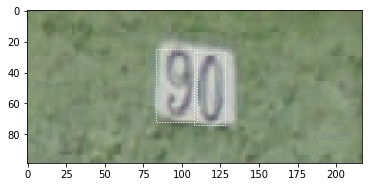

In [36]:
image = Image.open(path_to_image_file)
plt.figure()
currentAxis = plt.gca()
currentAxis.imshow(image)
for attr_left, attr_top, attr_width, attr_height in zip(attrs_left, attrs_top, 
                                                        attrs_width, attrs_height):
    currentAxis.add_patch(Rectangle((attr_left, attr_top), attr_width, attr_height, 
                                    fill=False, edgecolor='white', linestyle='dotted'))
plt.show()